In [1]:
import pandas as pd
import pandas_datareader as pdr
import FinanceDataReader as fdr
import numpy as np

Dubai / 동 / 선박운임료 / 석탄의 경우 Bloomberg Terminal 활용하여 확보
코로나 관련 데이터는 깃허브의 csv파일로 확보
S&P Energy 가격은 Investing.com을 통해 csv파일로 확보하였다.
그 외의 데이터는 Pandas_datareader 와 FinanceDataReader를 통해 확보하였다.

# 데이터 합치기 및 확인(+EDA)

데이터 별 특징 정리:

2020년 코로나 데이터를 포함하는 데이터 = 코로나 / 비트코인

In [2]:
df_2020 = pd.read_csv('data/df_2020.csv')
df_2020.Date = pd.to_datetime(df_2020.Date)
df_2020

,Date,WTI,Brent,Gas,Gold,Copper,Bdiy,new_cases,vaccination,Dollar,Bitcoin,Snp,Open,High,Low,Volume,Energy
0,2020-01-02,61.17,67.05,2.122,1520.55,6188.0,976.0,0.0,0.0,96.525,6967.0,3257.85,456.46,460.93,456.46,133.61,460.34
1,2020-01-03,63.00,69.08,2.130,1547.40,6129.5,907.0,0.0,0.0,96.521,7343.1,3234.85,460.34,465.54,456.81,171.55,458.77
2,2020-01-06,63.27,70.25,2.135,1576.85,6138.5,844.0,0.0,0.0,96.350,7759.1,3246.28,458.77,464.81,458.77,195.33,462.34
3,2020-01-07,62.70,68.74,2.162,1566.50,6149.0,791.0,0.0,0.0,96.702,8155.7,3237.18,462.34,462.34,455.75,197.25,461.39
4,2020-01-08,59.65,67.31,2.141,1582.85,6178.0,773.0,0.0,0.0,96.996,8059.6,3253.05,461.39,461.39,452.84,187.23,453.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,2021-10-14,81.43,83.86,5.687,1797.15,9984.0,5062.0,1407791.0,63331126.0,93.961,57345.8,4438.23,427.19,433.94,427.19,167.51,432.43
437,2021-10-15,82.39,84.67,5.410,1781.45,10281.0,4854.0,1458486.0,68354252.0,93.938,61672.5,4471.37,432.43,438.73,432.43,173.94,434.44
438,2021-10-18,82.62,84.13,4.989,1762.45,10196.0,4732.0,1339231.0,69279898.0,93.945,62056.3,4486.48,434.44,441.08,432.57,217.66,434.89
439,2021-10-19,83.19,85.02,5.088,1779.40,10149.5,4714.0,1419351.0,79280514.0,93.728,64278.5,4519.63,434.89,441.40,434.47,175.70,439.87


## EDA 및 시각화

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_hm2=df_2020.drop(['Open','High', 'Low'],axis=1)
df_hm2.head()
df_hm2_corr = df_hm2.corr()
df_hm2_corr

,WTI,Brent,Gas,Gold,Copper,Bdiy,new_cases,vaccination,Dollar,Bitcoin,Snp,Volume,Energy
WTI,1.000000,0.984433,0.745503,0.082865,0.869105,0.780071,0.532558,0.763553,-0.619955,0.779901,0.902560,-0.585771,0.814355
Brent,0.984433,1.000000,0.734564,0.047469,0.861840,0.768435,0.515337,0.753807,-0.606086,0.777471,0.899252,-0.597893,0.849026
Gas,0.745503,0.734564,1.000000,0.229528,0.758351,0.905673,0.580421,0.722840,-0.495727,0.681087,0.832766,-0.363991,0.445904
Gold,0.082865,0.047469,0.229528,1.000000,0.324910,0.246209,0.496333,0.102934,-0.664483,0.121812,0.320992,-0.238186,-0.309111
Copper,0.869105,0.861840,0.758351,0.324910,1.000000,0.823721,0.784903,0.819451,-0.803671,0.900127,0.956149,-0.499724,0.603437
Bdiy,0.780071,0.768435,0.905673,0.246209,0.823721,1.000000,0.590796,0.814953,-0.502319,0.743473,0.854910,-0.414132,0.491437
new_cases,0.532558,0.515337,0.580421,0.496333,0.784903,0.590796,1.000000,0.519085,-0.806197,0.737872,0.758695,-0.360164,0.170053
vaccination,0.763553,0.753807,0.722840,0.102934,0.819451,0.814953,0.519085,1.000000,-0.449064,0.683180,0.828389,-0.400834,0.595167
Dollar,-0.619955,-0.606086,-0.495727,-0.664483,-0.803671,-0.502319,-0.806197,-0.449064,1.000000,-0.657765,-0.759431,0.430750,-0.268707
Bitcoin,0.779901,0.777471,0.681087,0.121812,0.900127,0.743473,0.737872,0.683180,-0.657765,1.000000,0.853450,-0.396084,0.586202


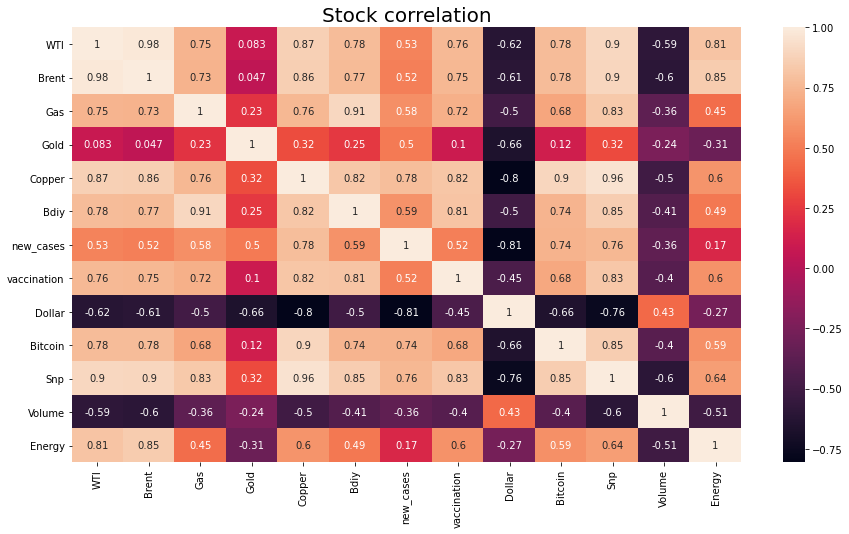

In [5]:
plt.figure(figsize = (15,8))
sns.heatmap(df_hm2_corr, annot=True)
plt.title('Stock correlation', fontsize=20)
plt.show()

In [6]:
X = df_hm2.iloc[:,1:-1]  # volume 값의 경우 2019년 이후로 작성되지 않아 여기선 미반영 하겠다
y = df_2020['Energy']

In [7]:
import statsmodels.api as sm
model = sm.OLS(y,X)

res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Energy   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              9468.
Date:                Fri, 12 Nov 2021   Prob (F-statistic):                        0.00
Time:                        11:07:13   Log-Likelihood:                         -1959.4
No. Observations:                 441   AIC:                                      3943.
Df Residuals:                     429   BIC:                                      3992.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
WTI            -0.6376      0.352     -1.811      0.071      -1.329       0.054
Brent           3.4791      0.398      8.750      0.000       2.698       4.261
Gas           -15.6673      2.881     -5.437      0.000     -21.331     -10.004
Gold           -0.1541      0.016     -9.694      0.000      -0.185      -0.123
Copper          0.0080      0.003      2.417      0.016       0.001       0.015
Bdiy           -0.0094      0.002     -3.774      0.000      -0.014      -0.004
new_cases   -2.714e-05   2.96e-06     -9.182      0.000    -3.3e-05   -2.13e-05
vaccination -7.301e-08   5.82e-08     -1.255      0.210   -1.87e-07    4.14e-08
Dollar          2.5634      0.216     11.871      0.000       2.139       2.988
Bitcoin      7.053e-05      0.000      0.419      0.676      -0.000       0.000
Snp             0.0679      0.012      5.697      0.000       0.044       0.091
Volume         -0.0252      0.015     -1.714      0.087      -0.054       0.004
==============================================================================
Omnibus:                        2.937   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                3.217
Skew:                          -0.034   Prob(JB):                        0.200
Kurtosis:                       3.413   Cond. No.                     1.64e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.64e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Feature Selection
- 과도한 상관관계 / 또는 높은 설명력을 가진 변수의 경우 제외하기로 결정하였다
    Crewd Oil 값은 우선 제거하여 돌려보기로 하였다.(이 값은 조금 생각해 보고)
- Copper의 경우 회귀분석에 있어서 너무 높은 pvalue를 보여 우선적으로 탈락

In [8]:
X2 = df_2020.drop(['Date','Brent','Copper'], axis =1)
y2 = df_2020['Energy']

In [9]:
X2

,WTI,Gas,Gold,Bdiy,new_cases,vaccination,Dollar,Bitcoin,Snp,Open,High,Low,Volume,Energy
0,61.17,2.122,1520.55,976.0,0.0,0.0,96.525,6967.0,3257.85,456.46,460.93,456.46,133.61,460.34
1,63.00,2.130,1547.40,907.0,0.0,0.0,96.521,7343.1,3234.85,460.34,465.54,456.81,171.55,458.77
2,63.27,2.135,1576.85,844.0,0.0,0.0,96.350,7759.1,3246.28,458.77,464.81,458.77,195.33,462.34
3,62.70,2.162,1566.50,791.0,0.0,0.0,96.702,8155.7,3237.18,462.34,462.34,455.75,197.25,461.39
4,59.65,2.141,1582.85,773.0,0.0,0.0,96.996,8059.6,3253.05,461.39,461.39,452.84,187.23,453.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,81.43,5.687,1797.15,5062.0,1407791.0,63331126.0,93.961,57345.8,4438.23,427.19,433.94,427.19,167.51,432.43
437,82.39,5.410,1781.45,4854.0,1458486.0,68354252.0,93.938,61672.5,4471.37,432.43,438.73,432.43,173.94,434.44
438,82.62,4.989,1762.45,4732.0,1339231.0,69279898.0,93.945,62056.3,4486.48,434.44,441.08,432.57,217.66,434.89
439,83.19,5.088,1779.40,4714.0,1419351.0,79280514.0,93.728,64278.5,4519.63,434.89,441.40,434.47,175.70,439.87


Train/Test Split

## 2020년의 경우

In [10]:
t = len(df_2020.loc[df_2020.Date < '2021-07-31',:])
X = np.array(df_2020.drop(['Date','Brent','Energy'],axis =1))
y = np.array(df_2020.Energy)

# LSTM

In [11]:
from sklearn.preprocessing import MinMaxScaler
def Scaler(X,y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler1 = scaler.fit(X)
    trainX = scaler1.transform(X)
    y = np.reshape(y ,(-1,1)) # 스케일러에 들어가려면 reshape이 필요함
    scaler = scaler.fit(y)
    trainy = scaler.transform(y)
    # LSTM 을 위한 reshape
    tX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
    ty = trainy
    return tX, ty, scaler1

In [12]:
tX, ty, scaler3 = Scaler(X, y)

In [13]:
tX_train = tX[0:t,:]
tX_test = tX[t:,:]
ty_train = ty[0:t,:]
ty_test = ty[t:,:]

3개의 train 구분에 대하여 각각의 모델 적용 하는 함수를 작성해야 한다.

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN , LSTM , GRU , Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#LSTM 모델 만드는 과정
def model_build(x,y):
    tf.random.set_seed(1)
    model = Sequential()
    model.add(LSTM(16, 
                   input_shape=(x,y), 
                   activation='tanh', 
                   return_sequences=True)
              )
    model.add(LSTM(16, activation = 'tanh',return_sequences=True))
    model.add(LSTM(16, activation = 'tanh',return_sequences=True))
    model.add(LSTM(16, activation = 'tanh'))
    model.add(Dense(1))

    model.summary()
    return model
# LSTM 모델 학습 코드(model_build포함)
def Train(xtrain,ytrain,xtest,ytest,number):
    model = model_build(xtrain.shape[1],xtrain.shape[2])
    model.compile(loss='mae' , optimizer='adam')
    earlyStopping = EarlyStopping(min_delta=0.001, monitor = 'loss', patience = 100, restore_best_weights = True)
    modelCheckPoint = ModelCheckpoint(filepath = f'best_model_{number}.h5', monitor = 'val_loss')
    
    hist = model.fit(xtrain, ytrain ,epochs=1000,validation_data=(xtest,ytest ), batch_size = 100, callbacks = [earlyStopping, modelCheckPoint] )
    
    #graph
    yhat = model.predict(xtest)
    mse = np.square(np.subtract(ytest,yhat)).mean()
    print(f"모델의 MSE 값은 {mse}입니다")

    plt.plot(yhat, label = "LSTM", lw= 3,ls="--")
    plt.plot(ytest, label="real")
    plt.legend()
    plt.savefig(f'picture/LSTM{number}.jpg')
    plt.show()
    return yhat, ytest

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 14, 16)            1152      
_________________________________________________________________
lstm_1 (LSTM)                (None, 14, 16)            2112      
_________________________________________________________________
lstm_2 (LSTM)                (None, 14, 16)            2112      
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 13s 546ms/step - loss: 0.4769 - val_loss: 0.6540
Epoch 2/1000
4/4 [=

Epoch 73/1000
4/4 [==============================] - 0s 42ms/step - loss: 0.0349 - val_loss: 0.0378
Epoch 74/1000
4/4 [==============================] - 0s 75ms/step - loss: 0.0367 - val_loss: 0.0466
Epoch 75/1000
4/4 [==============================] - 0s 65ms/step - loss: 0.0324 - val_loss: 0.0397
Epoch 76/1000
4/4 [==============================] - 0s 52ms/step - loss: 0.0329 - val_loss: 0.0381
Epoch 77/1000
4/4 [==============================] - 0s 64ms/step - loss: 0.0306 - val_loss: 0.0333
Epoch 78/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0297 - val_loss: 0.0350
Epoch 79/1000
4/4 [==============================] - 0s 44ms/step - loss: 0.0291 - val_loss: 0.0397
Epoch 80/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0300 - val_loss: 0.0658
Epoch 81/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0305 - val_loss: 0.0438
Epoch 82/1000
4/4 [==============================] - 0s 54ms/step - loss: 0.0273 - val_loss: 0.0354


4/4 [==============================] - 0s 36ms/step - loss: 0.0190 - val_loss: 0.0313
Epoch 155/1000
4/4 [==============================] - 0s 46ms/step - loss: 0.0191 - val_loss: 0.0722
Epoch 156/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0207 - val_loss: 0.0646
Epoch 157/1000
4/4 [==============================] - 0s 59ms/step - loss: 0.0204 - val_loss: 0.0394
Epoch 158/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.0198 - val_loss: 0.0230
Epoch 159/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.0207 - val_loss: 0.0366
Epoch 160/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0202 - val_loss: 0.0625
Epoch 161/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0195 - val_loss: 0.0410
Epoch 162/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0206 - val_loss: 0.0398
Epoch 163/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0200 - val_loss: 0.0218
Epoch

4/4 [==============================] - 0s 45ms/step - loss: 0.0180 - val_loss: 0.0365
Epoch 236/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.0190 - val_loss: 0.0480
Epoch 237/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0196 - val_loss: 0.0540
Epoch 238/1000
4/4 [==============================] - 1s 250ms/step - loss: 0.0200 - val_loss: 0.0360
Epoch 239/1000
4/4 [==============================] - 0s 60ms/step - loss: 0.0189 - val_loss: 0.0371
Epoch 240/1000
4/4 [==============================] - 0s 46ms/step - loss: 0.0182 - val_loss: 0.0301
Epoch 241/1000
4/4 [==============================] - 0s 46ms/step - loss: 0.0192 - val_loss: 0.0451
Epoch 242/1000
4/4 [==============================] - 0s 59ms/step - loss: 0.0180 - val_loss: 0.0510
Epoch 243/1000
4/4 [==============================] - 0s 56ms/step - loss: 0.0193 - val_loss: 0.0375
Epoch 244/1000
4/4 [==============================] - 0s 51ms/step - loss: 0.0193 - val_loss: 0.0346
Epoc

4/4 [==============================] - 0s 58ms/step - loss: 0.0177 - val_loss: 0.0238
Epoch 317/1000
4/4 [==============================] - 0s 49ms/step - loss: 0.0190 - val_loss: 0.0276
Epoch 318/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0168 - val_loss: 0.0404
Epoch 319/1000
4/4 [==============================] - 0s 52ms/step - loss: 0.0177 - val_loss: 0.0362
Epoch 320/1000
4/4 [==============================] - 0s 58ms/step - loss: 0.0171 - val_loss: 0.0412
Epoch 321/1000
4/4 [==============================] - 0s 67ms/step - loss: 0.0178 - val_loss: 0.0397
Epoch 322/1000
4/4 [==============================] - 0s 56ms/step - loss: 0.0174 - val_loss: 0.0315
Epoch 323/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0172 - val_loss: 0.0200
Epoch 324/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0173 - val_loss: 0.0282
Epoch 325/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0170 - val_loss: 0.0213
Epoch

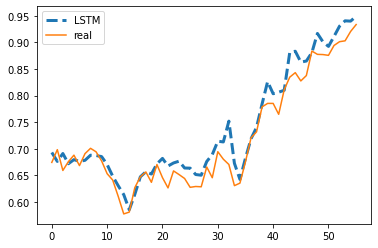

In [15]:
yhat, ytest =Train(tX_train, ty_train, tX_test,ty_test,4)

In [16]:
#inverse scaler
yhat = scaler3.inverse_transform(yhat)
ytest = scaler3.inverse_transform(ytest)

# S&P500 Energy 섹터 소속 5개 회사

In [17]:
### ExxonMobil 불러오기

df_XOM = fdr.DataReader('XOM', '2020-01-01', '2021-10-21')
df_XOM

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,70.90,70.24,71.02,70.24,12410000.0,0.0161
2020-01-03,70.33,71.34,71.37,70.16,17390000.0,-0.0080
2020-01-06,70.87,70.32,71.36,70.23,20080000.0,0.0077
2020-01-07,70.29,70.50,70.52,69.51,17500000.0,-0.0082
2020-01-08,69.23,70.11,70.28,69.17,15140000.0,-0.0151
...,...,...,...,...,...,...
2021-10-15,62.59,62.73,63.07,62.44,16090000.0,0.0095
2021-10-18,62.56,63.09,63.14,62.27,18270000.0,-0.0005
2021-10-19,63.50,62.87,63.61,62.67,18930000.0,0.0150


In [18]:
### Chevron Corporation 불러오기

df_CVX = fdr.DataReader('CVX', '2020-01-01', '2021-10-21')
df_CVX

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,121.43,120.81,121.62,120.77,5210000.0,0.0076
2020-01-03,121.01,121.78,122.72,120.74,6360000.0,-0.0035
2020-01-06,120.60,121.24,121.67,120.33,9950000.0,-0.0034
2020-01-07,119.06,119.02,119.73,117.77,7880000.0,-0.0128
2020-01-08,117.70,118.55,119.09,117.65,7300000.0,-0.0114
...,...,...,...,...,...,...
2021-10-15,109.61,109.77,110.03,109.43,9970000.0,0.0074
2021-10-18,109.56,110.22,110.41,108.96,10500000.0,-0.0005
2021-10-19,111.70,110.16,111.70,109.79,10360000.0,0.0195


In [19]:
### ConocoPhillips 불러오기

df_COP = fdr.DataReader('COP', '2020-01-01', '2021-10-21')
df_COP

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,65.46,65.28,65.68,64.85,4120000.0,0.0066
2020-01-03,65.70,67.04,67.13,65.07,6330000.0,0.0037
2020-01-06,66.48,66.28,66.94,65.88,8830000.0,0.0119
2020-01-07,66.48,66.44,66.49,65.74,5980000.0,0.0000
2020-01-08,64.94,66.45,66.63,64.52,6470000.0,-0.0232
...,...,...,...,...,...,...
2021-10-15,74.14,74.63,74.93,74.13,6950000.0,0.0039
2021-10-18,74.50,74.77,75.75,74.13,9910000.0,0.0049
2021-10-19,75.32,74.84,75.85,74.38,6590000.0,0.0110


In [20]:
### Devon Energy 불러오기

df_DVN = fdr.DataReader('DVN', '2020-01-01', '2021-10-21')
df_DVN

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,24.86,25.27,25.34,24.71,5050000.0,-0.0072
2020-01-03,25.16,25.55,25.58,24.99,6980000.0,0.0121
2020-01-06,25.46,25.38,25.60,25.15,4390000.0,0.0119
2020-01-07,25.54,25.31,25.62,25.16,6460000.0,0.0031
2020-01-08,24.63,25.50,25.54,24.30,8230000.0,-0.0356
...,...,...,...,...,...,...
2021-10-15,40.10,40.25,40.98,40.03,7740000.0,0.0080
2021-10-18,40.52,40.67,41.98,39.88,11510000.0,0.0105
2021-10-19,40.30,40.64,41.81,40.11,16070000.0,-0.0054


In [21]:
### Marathon Oil 불러오기

df_MRO = fdr.DataReader('MRO', '2020-01-01', '2021-10-21')
df_MRO

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,13.68,13.69,13.75,13.55,10130000.0,0.0074
2020-01-03,13.75,14.05,14.07,13.60,14860000.0,0.0051
2020-01-06,13.96,13.84,14.01,13.74,12020000.0,0.0153
2020-01-07,13.79,13.76,13.84,13.61,9620000.0,-0.0122
2020-01-08,13.28,13.80,13.82,13.02,15600000.0,-0.0370
...,...,...,...,...,...,...
2021-10-15,16.18,16.42,16.53,16.16,12690000.0,0.0025
2021-10-18,16.43,16.48,16.84,16.24,25240000.0,0.0155
2021-10-19,16.39,16.46,16.62,16.27,18510000.0,-0.0024


## 데이터 셋 합본

In [22]:
df_raw = df_2020.drop(['Open','High','Low','Volume','Energy'],axis = 1)
df_raw = df_raw.set_index(df_2020.Date) 

In [23]:
MRO_df = df_raw.merge(df_MRO, how = 'inner',left_on=df_raw.Date,right_index=True)
MRO_df = MRO_df.drop(['key_0','Date'],axis=1)
XOM_df = df_raw.merge(df_XOM, how = 'inner',left_on=df_raw.Date,right_index=True)
XOM_df = XOM_df.drop(['key_0','Date'],axis=1)
CVX_df = df_raw.merge(df_CVX, how = 'inner',left_on=df_raw.Date,right_index=True)
CVX_df = CVX_df.drop(['key_0','Date'],axis=1)
COP_df = df_raw.merge(df_COP, how = 'inner',left_on=df_raw.Date,right_index=True)
COP_df = COP_df.drop(['key_0','Date'],axis=1)
DVN_df = df_raw.merge(df_DVN, how = 'inner',left_on=df_raw.Date,right_index=True)
DVN_df = DVN_df.drop(['key_0','Date'],axis=1)

## LSTM 개별 주식 돌려보기

In [24]:
def LSTM_indiv(df,ticker):
    X = df.drop(['Brent','Copper','Close','Change'],axis =1)
    y = np.array(df.Close)
    tX, ty, scaler1 = Scaler(X, y)
    tX_train = tX[0:t,:]
    tX_test = tX[t:,:]
    ty_train = ty[0:t,:]
    ty_test = ty[t:,:]
    print(tX_train.shape, tX_test.shape, ty_train.shape, ty_test.shape)
    yhat, ytest =Train(tX_train, ty_train, tX_test,ty_test,ticker)
    return yhat, ytest, scaler1

(385, 13, 1) (56, 13, 1) (385, 1) (56, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 13, 16)            1152      
_________________________________________________________________
lstm_5 (LSTM)                (None, 13, 16)            2112      
_________________________________________________________________
lstm_6 (LSTM)                (None, 13, 16)            2112      
_________________________________________________________________
lstm_7 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 10s 623ms/step - loss: 0

4/4 [==============================] - 0s 36ms/step - loss: 0.0284 - val_loss: 0.0561
Epoch 73/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0290 - val_loss: 0.0322
Epoch 74/1000
4/4 [==============================] - 0s 46ms/step - loss: 0.0256 - val_loss: 0.0269
Epoch 75/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0275 - val_loss: 0.0266
Epoch 76/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0244 - val_loss: 0.0483
Epoch 77/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0241 - val_loss: 0.0240
Epoch 78/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0221 - val_loss: 0.0238
Epoch 79/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0230 - val_loss: 0.0540
Epoch 80/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.0227 - val_loss: 0.0577
Epoch 81/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0228 - val_loss: 0.0308
Epoch 82/1000


4/4 [==============================] - 0s 31ms/step - loss: 0.0174 - val_loss: 0.0204
Epoch 154/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.0186 - val_loss: 0.0296
Epoch 155/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.0175 - val_loss: 0.0509
Epoch 156/1000
4/4 [==============================] - 0s 49ms/step - loss: 0.0222 - val_loss: 0.0202
Epoch 157/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0208 - val_loss: 0.0218
Epoch 158/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0194 - val_loss: 0.0298
Epoch 159/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0173 - val_loss: 0.0304
Epoch 160/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0165 - val_loss: 0.0356
Epoch 161/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.0168 - val_loss: 0.0318
Epoch 162/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.0173 - val_loss: 0.0326
Epoch

4/4 [==============================] - 0s 33ms/step - loss: 0.0164 - val_loss: 0.0225
Epoch 235/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0160 - val_loss: 0.0246
Epoch 236/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0162 - val_loss: 0.0317
Epoch 237/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0172 - val_loss: 0.0227
Epoch 238/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.0154 - val_loss: 0.0223
Epoch 239/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0161 - val_loss: 0.0247
Epoch 240/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0160 - val_loss: 0.0261
Epoch 241/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0163 - val_loss: 0.0288
Epoch 242/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0159 - val_loss: 0.0240
Epoch 243/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0162 - val_loss: 0.0245
Epoch

4/4 [==============================] - 0s 32ms/step - loss: 0.0163 - val_loss: 0.0325
Epoch 316/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0173 - val_loss: 0.0293
모델의 MSE 값은 0.0010935087436212563입니다


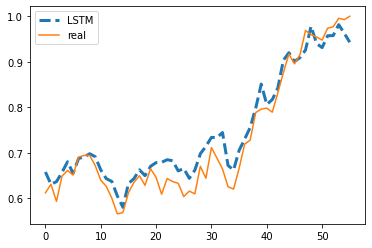

In [25]:
yhat1, ytest1, scaler1 = LSTM_indiv(MRO_df,"MRO")

(385, 13, 1) (56, 13, 1) (385, 1) (56, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 13, 16)            1152      
_________________________________________________________________
lstm_9 (LSTM)                (None, 13, 16)            2112      
_________________________________________________________________
lstm_10 (LSTM)               (None, 13, 16)            2112      
_________________________________________________________________
lstm_11 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 10s 715ms/step - loss: 0

4/4 [==============================] - 0s 37ms/step - loss: 0.0339 - val_loss: 0.0366
Epoch 73/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0336 - val_loss: 0.0278
Epoch 74/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0348 - val_loss: 0.0288
Epoch 75/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0343 - val_loss: 0.0259
Epoch 76/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0326 - val_loss: 0.0514
Epoch 77/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0332 - val_loss: 0.0331
Epoch 78/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0314 - val_loss: 0.0376
Epoch 79/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0308 - val_loss: 0.0416
Epoch 80/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0315 - val_loss: 0.0608
Epoch 81/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.0317 - val_loss: 0.0288
Epoch 82/1000


4/4 [==============================] - 0s 39ms/step - loss: 0.0224 - val_loss: 0.0581
Epoch 154/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0233 - val_loss: 0.0706
Epoch 155/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0232 - val_loss: 0.1016
Epoch 156/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0275 - val_loss: 0.0618
Epoch 157/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0237 - val_loss: 0.0318
Epoch 158/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0256 - val_loss: 0.0326
Epoch 159/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0269 - val_loss: 0.0729
Epoch 160/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0265 - val_loss: 0.0840
Epoch 161/1000
4/4 [==============================] - 0s 46ms/step - loss: 0.0264 - val_loss: 0.0199
Epoch 162/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0280 - val_loss: 0.0608
Epoch

4/4 [==============================] - 0s 45ms/step - loss: 0.0195 - val_loss: 0.0520
Epoch 235/1000
4/4 [==============================] - 0s 73ms/step - loss: 0.0192 - val_loss: 0.0460
Epoch 236/1000
4/4 [==============================] - 0s 58ms/step - loss: 0.0192 - val_loss: 0.0538
Epoch 237/1000
4/4 [==============================] - 0s 59ms/step - loss: 0.0200 - val_loss: 0.0609
Epoch 238/1000
4/4 [==============================] - 0s 51ms/step - loss: 0.0205 - val_loss: 0.0629
Epoch 239/1000
4/4 [==============================] - 0s 63ms/step - loss: 0.0199 - val_loss: 0.0617
Epoch 240/1000
4/4 [==============================] - 0s 63ms/step - loss: 0.0193 - val_loss: 0.0562
Epoch 241/1000
4/4 [==============================] - 0s 49ms/step - loss: 0.0192 - val_loss: 0.0522
Epoch 242/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0194 - val_loss: 0.0447
Epoch 243/1000
4/4 [==============================] - 0s 49ms/step - loss: 0.0197 - val_loss: 0.0385
Epoch

Epoch 315/1000
4/4 [==============================] - 0s 84ms/step - loss: 0.0186 - val_loss: 0.0276
Epoch 316/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.0174 - val_loss: 0.0223
Epoch 317/1000
4/4 [==============================] - 0s 55ms/step - loss: 0.0197 - val_loss: 0.0173
Epoch 318/1000
4/4 [==============================] - 0s 51ms/step - loss: 0.0210 - val_loss: 0.0418
Epoch 319/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0221 - val_loss: 0.0391
Epoch 320/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0211 - val_loss: 0.0249
Epoch 321/1000
4/4 [==============================] - 0s 50ms/step - loss: 0.0191 - val_loss: 0.0226
Epoch 322/1000
4/4 [==============================] - 0s 42ms/step - loss: 0.0177 - val_loss: 0.0213
Epoch 323/1000
4/4 [==============================] - 0s 49ms/step - loss: 0.0176 - val_loss: 0.0288
Epoch 324/1000
4/4 [==============================] - 0s 53ms/step - loss: 0.0177 - val_los

4/4 [==============================] - 0s 53ms/step - loss: 0.0164 - val_loss: 0.0259
Epoch 397/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0169 - val_loss: 0.0231
Epoch 398/1000
4/4 [==============================] - 0s 52ms/step - loss: 0.0172 - val_loss: 0.0230
Epoch 399/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0168 - val_loss: 0.0299
Epoch 400/1000
4/4 [==============================] - 0s 56ms/step - loss: 0.0171 - val_loss: 0.0252
Epoch 401/1000
4/4 [==============================] - 0s 49ms/step - loss: 0.0165 - val_loss: 0.0199
Epoch 402/1000
4/4 [==============================] - 0s 57ms/step - loss: 0.0175 - val_loss: 0.0179
Epoch 403/1000
4/4 [==============================] - 0s 42ms/step - loss: 0.0177 - val_loss: 0.0239
Epoch 404/1000
4/4 [==============================] - 0s 60ms/step - loss: 0.0169 - val_loss: 0.0218
Epoch 405/1000
4/4 [==============================] - 0s 64ms/step - loss: 0.0173 - val_loss: 0.0272
Epoch

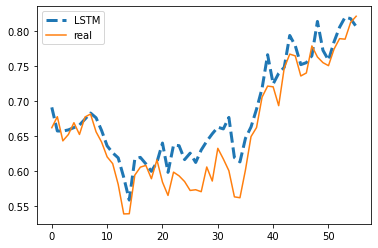

In [26]:
yhat2, ytest2, scaler2 = LSTM_indiv(XOM_df,"XOM")

(385, 13, 1) (56, 13, 1) (385, 1) (56, 1)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 13, 16)            1152      
_________________________________________________________________
lstm_13 (LSTM)               (None, 13, 16)            2112      
_________________________________________________________________
lstm_14 (LSTM)               (None, 13, 16)            2112      
_________________________________________________________________
lstm_15 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 11s 642ms/step - loss: 0

4/4 [==============================] - 0s 40ms/step - loss: 0.0512 - val_loss: 0.0519
Epoch 73/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0511 - val_loss: 0.0503
Epoch 74/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0509 - val_loss: 0.0572
Epoch 75/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0482 - val_loss: 0.0481
Epoch 76/1000
4/4 [==============================] - 0s 60ms/step - loss: 0.0483 - val_loss: 0.0646
Epoch 77/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0479 - val_loss: 0.0507
Epoch 78/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0463 - val_loss: 0.0491
Epoch 79/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0453 - val_loss: 0.0477
Epoch 80/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0452 - val_loss: 0.0588
Epoch 81/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.0451 - val_loss: 0.0440
Epoch 82/1000


4/4 [==============================] - 0s 36ms/step - loss: 0.0249 - val_loss: 0.0359
Epoch 154/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0266 - val_loss: 0.0571
Epoch 155/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0258 - val_loss: 0.0719
Epoch 156/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0286 - val_loss: 0.0267
Epoch 157/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0284 - val_loss: 0.0332
Epoch 158/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0263 - val_loss: 0.0538
Epoch 159/1000
4/4 [==============================] - 0s 54ms/step - loss: 0.0243 - val_loss: 0.0572
Epoch 160/1000
4/4 [==============================] - 0s 44ms/step - loss: 0.0246 - val_loss: 0.0565
Epoch 161/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0242 - val_loss: 0.0500
Epoch 162/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0240 - val_loss: 0.0580
Epoch

Epoch 234/1000
4/4 [==============================] - 0s 51ms/step - loss: 0.0209 - val_loss: 0.0729
Epoch 235/1000
4/4 [==============================] - 0s 77ms/step - loss: 0.0213 - val_loss: 0.0846
Epoch 236/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.0225 - val_loss: 0.0784
Epoch 237/1000
4/4 [==============================] - 0s 98ms/step - loss: 0.0213 - val_loss: 0.0616
Epoch 238/1000
4/4 [==============================] - 0s 138ms/step - loss: 0.0208 - val_loss: 0.0686
Epoch 239/1000
4/4 [==============================] - 0s 68ms/step - loss: 0.0208 - val_loss: 0.0829
Epoch 240/1000
4/4 [==============================] - 0s 78ms/step - loss: 0.0215 - val_loss: 0.0763
Epoch 241/1000
4/4 [==============================] - 0s 79ms/step - loss: 0.0207 - val_loss: 0.0755
Epoch 242/1000
4/4 [==============================] - 0s 119ms/step - loss: 0.0208 - val_loss: 0.0701
Epoch 243/1000
4/4 [==============================] - 0s 67ms/step - loss: 0.0224 - val_l

4/4 [==============================] - 0s 94ms/step - loss: 0.0198 - val_loss: 0.0435
Epoch 316/1000
4/4 [==============================] - 0s 49ms/step - loss: 0.0217 - val_loss: 0.0634
Epoch 317/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.0202 - val_loss: 0.0653
Epoch 318/1000
4/4 [==============================] - 0s 100ms/step - loss: 0.0195 - val_loss: 0.0561
Epoch 319/1000
4/4 [==============================] - 0s 79ms/step - loss: 0.0195 - val_loss: 0.0609
Epoch 320/1000
4/4 [==============================] - 0s 50ms/step - loss: 0.0200 - val_loss: 0.0724
Epoch 321/1000
4/4 [==============================] - 0s 68ms/step - loss: 0.0205 - val_loss: 0.0579
Epoch 322/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.0193 - val_loss: 0.0470
Epoch 323/1000
4/4 [==============================] - 0s 50ms/step - loss: 0.0201 - val_loss: 0.0614
Epoch 324/1000
4/4 [==============================] - 0s 50ms/step - loss: 0.0201 - val_loss: 0.0789
Epoc

4/4 [==============================] - 0s 71ms/step - loss: 0.0188 - val_loss: 0.0347
Epoch 397/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.0198 - val_loss: 0.0321
Epoch 398/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0191 - val_loss: 0.0515
Epoch 399/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0188 - val_loss: 0.0423
Epoch 400/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0185 - val_loss: 0.0397
Epoch 401/1000
4/4 [==============================] - 0s 49ms/step - loss: 0.0184 - val_loss: 0.0375
Epoch 402/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0193 - val_loss: 0.0376
Epoch 403/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0194 - val_loss: 0.0588
Epoch 404/1000
4/4 [==============================] - 0s 44ms/step - loss: 0.0191 - val_loss: 0.0600
Epoch 405/1000
4/4 [==============================] - 0s 42ms/step - loss: 0.0195 - val_loss: 0.0480
Epoch

Epoch 477/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0194 - val_loss: 0.0287
Epoch 478/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0188 - val_loss: 0.0203
Epoch 479/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0197 - val_loss: 0.0174
Epoch 480/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0190 - val_loss: 0.0268
Epoch 481/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0171 - val_loss: 0.0249
Epoch 482/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.0164 - val_loss: 0.0262
Epoch 483/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0168 - val_loss: 0.0224
Epoch 484/1000
4/4 [==============================] - 0s 42ms/step - loss: 0.0167 - val_loss: 0.0208
Epoch 485/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0167 - val_loss: 0.0202
Epoch 486/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0174 - val_los

4/4 [==============================] - 0s 60ms/step - loss: 0.0160 - val_loss: 0.0253
Epoch 559/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0164 - val_loss: 0.0235
Epoch 560/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0155 - val_loss: 0.0228
Epoch 561/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0165 - val_loss: 0.0228
Epoch 562/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0176 - val_loss: 0.0210
Epoch 563/1000
4/4 [==============================] - 0s 44ms/step - loss: 0.0175 - val_loss: 0.0214
Epoch 564/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0182 - val_loss: 0.0223
Epoch 565/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0162 - val_loss: 0.0233
Epoch 566/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0154 - val_loss: 0.0210
Epoch 567/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0154 - val_loss: 0.0217
Epoch

4/4 [==============================] - 0s 40ms/step - loss: 0.0155 - val_loss: 0.0243
Epoch 640/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0168 - val_loss: 0.0232
Epoch 641/1000
4/4 [==============================] - 0s 61ms/step - loss: 0.0158 - val_loss: 0.0230
Epoch 642/1000
4/4 [==============================] - 0s 44ms/step - loss: 0.0148 - val_loss: 0.0233
Epoch 643/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.0151 - val_loss: 0.0259
Epoch 644/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0174 - val_loss: 0.0248
Epoch 645/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0169 - val_loss: 0.0236
Epoch 646/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.0156 - val_loss: 0.0228
모델의 MSE 값은 0.0006572383755416875입니다


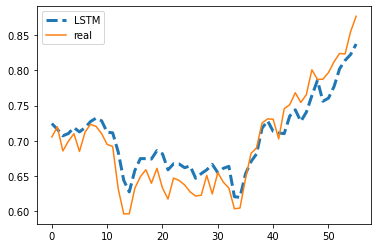

In [27]:
yhat3, ytest3, scaler3 = LSTM_indiv(CVX_df,"CVX")

(385, 13, 1) (56, 13, 1) (385, 1) (56, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 13, 16)            1152      
_________________________________________________________________
lstm_17 (LSTM)               (None, 13, 16)            2112      
_________________________________________________________________
lstm_18 (LSTM)               (None, 13, 16)            2112      
_________________________________________________________________
lstm_19 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 13s 577ms/step - loss: 0

Epoch 72/1000
4/4 [==============================] - 0s 65ms/step - loss: 0.0397 - val_loss: 0.0574
Epoch 73/1000
4/4 [==============================] - 0s 67ms/step - loss: 0.0386 - val_loss: 0.0573
Epoch 74/1000
4/4 [==============================] - 0s 56ms/step - loss: 0.0391 - val_loss: 0.0479
Epoch 75/1000
4/4 [==============================] - 0s 57ms/step - loss: 0.0361 - val_loss: 0.0873
Epoch 76/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0385 - val_loss: 0.0479
Epoch 77/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0379 - val_loss: 0.0529
Epoch 78/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0353 - val_loss: 0.0410
Epoch 79/1000
4/4 [==============================] - 0s 54ms/step - loss: 0.0336 - val_loss: 0.0376
Epoch 80/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0338 - val_loss: 0.0391
Epoch 81/1000
4/4 [==============================] - 0s 61ms/step - loss: 0.0328 - val_loss: 0.0421


4/4 [==============================] - 0s 60ms/step - loss: 0.0213 - val_loss: 0.0262
Epoch 154/1000
4/4 [==============================] - 0s 56ms/step - loss: 0.0214 - val_loss: 0.0247
Epoch 155/1000
4/4 [==============================] - 0s 56ms/step - loss: 0.0216 - val_loss: 0.0553
Epoch 156/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0261 - val_loss: 0.0254
Epoch 157/1000
4/4 [==============================] - 0s 51ms/step - loss: 0.0236 - val_loss: 0.0206
Epoch 158/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.0231 - val_loss: 0.0246
Epoch 159/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0223 - val_loss: 0.0439
Epoch 160/1000
4/4 [==============================] - 0s 51ms/step - loss: 0.0237 - val_loss: 0.0364
Epoch 161/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0221 - val_loss: 0.0210
Epoch 162/1000
4/4 [==============================] - 0s 106ms/step - loss: 0.0243 - val_loss: 0.0226
Epoc

4/4 [==============================] - 0s 39ms/step - loss: 0.0178 - val_loss: 0.0301
Epoch 235/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0173 - val_loss: 0.0301
Epoch 236/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.0180 - val_loss: 0.0360
Epoch 237/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0188 - val_loss: 0.0459
Epoch 238/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0194 - val_loss: 0.0294
Epoch 239/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0181 - val_loss: 0.0299
Epoch 240/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0176 - val_loss: 0.0302
Epoch 241/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.0180 - val_loss: 0.0384
Epoch 242/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0176 - val_loss: 0.0272
Epoch 243/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0177 - val_loss: 0.0320
Epoch

4/4 [==============================] - 0s 46ms/step - loss: 0.0186 - val_loss: 0.0297
Epoch 316/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0193 - val_loss: 0.0316
Epoch 317/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0190 - val_loss: 0.0340
Epoch 318/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0179 - val_loss: 0.0288
Epoch 319/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0172 - val_loss: 0.0297
Epoch 320/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0164 - val_loss: 0.0323
Epoch 321/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0166 - val_loss: 0.0292
Epoch 322/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0162 - val_loss: 0.0291
Epoch 323/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0165 - val_loss: 0.0284
Epoch 324/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0163 - val_loss: 0.0353
Epoch

Epoch 396/1000
4/4 [==============================] - 0s 50ms/step - loss: 0.0181 - val_loss: 0.0310
Epoch 397/1000
4/4 [==============================] - 0s 59ms/step - loss: 0.0174 - val_loss: 0.0315
Epoch 398/1000
4/4 [==============================] - 0s 51ms/step - loss: 0.0157 - val_loss: 0.0339
모델의 MSE 값은 0.00126719593357314입니다


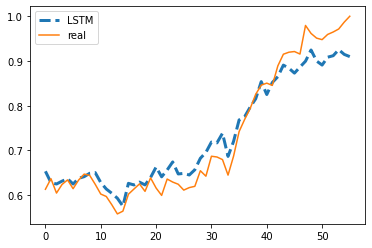

In [28]:
yhat4, ytest4, scaler4 = LSTM_indiv(COP_df,"COP")

(385, 13, 1) (56, 13, 1) (385, 1) (56, 1)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 13, 16)            1152      
_________________________________________________________________
lstm_21 (LSTM)               (None, 13, 16)            2112      
_________________________________________________________________
lstm_22 (LSTM)               (None, 13, 16)            2112      
_________________________________________________________________
lstm_23 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 10s 809ms/step - loss: 0

4/4 [==============================] - 0s 40ms/step - loss: 0.0357 - val_loss: 0.0837
Epoch 73/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.0344 - val_loss: 0.0809
Epoch 74/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0347 - val_loss: 0.0790
Epoch 75/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0329 - val_loss: 0.0857
Epoch 76/1000
4/4 [==============================] - 0s 51ms/step - loss: 0.0338 - val_loss: 0.0849
Epoch 77/1000
4/4 [==============================] - 0s 65ms/step - loss: 0.0305 - val_loss: 0.0848
Epoch 78/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0312 - val_loss: 0.0782
Epoch 79/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.0299 - val_loss: 0.0759
Epoch 80/1000
4/4 [==============================] - 0s 42ms/step - loss: 0.0282 - val_loss: 0.0731
Epoch 81/1000
4/4 [==============================] - 0s 46ms/step - loss: 0.0268 - val_loss: 0.0911
Epoch 82/1000


4/4 [==============================] - 0s 78ms/step - loss: 0.0130 - val_loss: 0.0213
Epoch 154/1000
4/4 [==============================] - 0s 55ms/step - loss: 0.0142 - val_loss: 0.0195
Epoch 155/1000
4/4 [==============================] - 0s 52ms/step - loss: 0.0121 - val_loss: 0.0328
Epoch 156/1000
4/4 [==============================] - 0s 56ms/step - loss: 0.0136 - val_loss: 0.0296
Epoch 157/1000
4/4 [==============================] - 0s 52ms/step - loss: 0.0142 - val_loss: 0.0207
Epoch 158/1000
4/4 [==============================] - 0s 50ms/step - loss: 0.0121 - val_loss: 0.0207
Epoch 159/1000
4/4 [==============================] - 0s 62ms/step - loss: 0.0118 - val_loss: 0.0203
Epoch 160/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.0114 - val_loss: 0.0207
Epoch 161/1000
4/4 [==============================] - 0s 59ms/step - loss: 0.0117 - val_loss: 0.0192
Epoch 162/1000
4/4 [==============================] - 0s 44ms/step - loss: 0.0118 - val_loss: 0.0262
Epoch

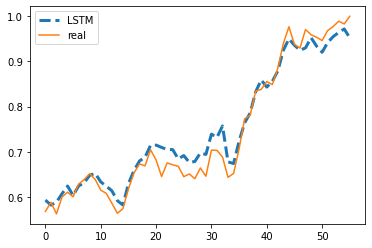

In [29]:
yhat5, ytest5, scaler5 = LSTM_indiv(DVN_df,"DVN")

In [30]:
# 수익률 계산
def return_cal(x,y):
    buy = 0
    n = 0
    for t in range(len(x)-1):
        today = x[t]
        predict = y[t+1]
        if predict > today:
            n+=1
            buy += today
        final_price = x[t]

    aver_purch = buy/n
    r_rate = ((final_price - aver_purch)/aver_purch)*100
    actual_return = (final_price-x[0])/(x[0])*100
    exceed = r_rate - actual_return
    print(aver_purch, final_price,n)
    print('최종 수익률: %.3f \n시장 수익률: %.3f \n추가 수익률: %.3f' % (r_rate, actual_return, exceed))

In [31]:
return_cal(ytest,yhat)
return_cal(ytest1,yhat1)
return_cal(ytest2,yhat2)
return_cal(ytest3,yhat3)
return_cal(ytest4,yhat4)
return_cal(ytest5,yhat5)

[384.27934783] [439.87] 46
최종 수익률: 14.466 
시장 수익률: 18.778 
추가 수익률: -4.312
[0.69623535] [0.99252057] 45
최종 수익률: 42.555 
시장 수익률: 62.225 
추가 수익률: -19.670
[0.6499582] [0.81242079] 47
최종 수익률: 24.996 
시장 수익률: 22.656 
추가 수익률: 2.340
[0.65852469] [0.85522988] 36
최종 수익률: 29.871 
시장 수익률: 21.240 
추가 수익률: 8.630
[0.65940932] [0.9868791] 39
최종 수익률: 49.661 
시장 수익률: 60.960 
추가 수익률: -11.299
[0.6852393] [0.98290838] 42
최종 수익률: 43.440 
시장 수익률: 73.064 
추가 수익률: -29.623


# 파마 프렌치 모델

In [32]:
import pandas_datareader.data as web
import pandas_datareader.famafrench as ff
import statsmodels.api as smf

In [33]:
test_ff = ff.get_available_datasets()

In [34]:
df_12_industry = [test_fff for test_fff in test_ff if '12_Industry_Portfolios' in test_fff and 'Industry_Portfolios' in test_fff]

In [35]:
ds_industry = web.DataReader(df_12_industry[2],'famafrench', start='2020-01-01', end='2021-10-21')
print(ds_industry)

{0:             NoDur  Durbl  Manuf  Enrgy  Chems  BusEq  Telcm  Utils  Shops  \
Date                                                                        
2020-01-02  -0.73   1.37   1.30   0.94  -1.08   1.83   0.44  -1.31   0.94   
2020-01-03  -0.03  -0.67  -0.24  -0.33  -0.97  -0.81  -0.46   0.20  -0.72   
2020-01-06   0.20   0.23  -0.22   0.82  -0.07   0.70  -0.07   0.21   0.53   
2020-01-07  -0.72   0.43  -0.01  -0.18  -0.55   0.05   0.10  -0.20  -0.20   
2020-01-08   0.42   1.10   0.00  -1.90   0.45   0.88   0.31  -0.26  -0.01   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2021-09-24  -0.24   1.71  -0.64   0.79  -0.23   0.14  -0.22  -0.11   0.31   
2021-09-27  -0.02   1.90   0.70   3.81  -0.02  -1.05   0.37  -0.56   0.01   
2021-09-28  -1.40  -1.52  -1.66   0.21  -1.06  -3.21  -1.41  -1.15  -2.11   
2021-09-29   0.72   0.18  -0.13   0.06   0.36  -0.33   0.52   1.16   0.24   
2021-09-30  -2.12  -0.96  -1.81  -1.19  -1.49  -0.42  -0.94  -0.93  -1.7

In [36]:
print(ds_industry.keys())
print(ds_industry['DESCR'])

dict_keys([0, 1, 'DESCR'])
12 Industry Portfolios daily
----------------------------

This file was created by CMPT_IND_RETS_DAILY using the 202109 CRSP database. It contains value- and equal-weighted returns for 12 industry portfolios. The portfolios are constructed at the end of June. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French

  0 : Average Value Weighted Returns -- Daily (441 rows x 12 cols)
  1 : Average Equal Weighted Returns -- Daily (441 rows x 12 cols)


In [37]:
ds_industry[0].tail()

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
2021-09-24,-0.24,1.71,-0.64,0.79,-0.23,0.14,-0.22,-0.11,0.31,-0.91,0.56,0.25
2021-09-27,-0.02,1.90,0.70,3.81,-0.02,-1.05,0.37,-0.56,0.01,-1.10,1.28,0.29
2021-09-28,-1.40,-1.52,-1.66,0.21,-1.06,-3.21,-1.41,-1.15,-2.11,-1.87,-1.64,-1.53
2021-09-29,0.72,0.18,-0.13,0.06,0.36,-0.33,0.52,1.16,0.24,0.42,0.18,-0.12
2021-09-30,-2.12,-0.96,-1.81,-1.19,-1.49,-0.42,-0.94,-0.93,-1.76,-0.61,-1.61,-1.08


## 파마 프렌치 모델 5요인

In [38]:
df_5_factor = [ test_fff for test_fff in test_ff if '5' in test_fff and 'Factor' in test_fff ]

In [39]:
ds_factors = web.DataReader(df_5_factor[1], 'famafrench', start='2020-01-01', end='2021-10-21')
print(ds_factors)

{0:             Mkt-RF   SMB   HML   RMW   CMA     RF
Date                                             
2020-01-02    0.86 -0.97 -0.32  0.24 -0.22  0.006
2020-01-03   -0.67  0.30  0.00 -0.14 -0.11  0.006
2020-01-06    0.36 -0.21 -0.54 -0.17 -0.26  0.006
2020-01-07   -0.19 -0.03 -0.25 -0.13 -0.25  0.006
2020-01-08    0.47 -0.17 -0.65 -0.19 -0.17  0.006
...            ...   ...   ...   ...   ...    ...
2021-09-24    0.08 -0.39  0.70  0.62  0.23  0.000
2021-09-27   -0.10  1.73  2.39 -0.27  0.76  0.000
2021-09-28   -2.18  0.01  1.75  0.84  1.07  0.000
2021-09-29    0.03 -0.18  0.80  1.15  0.35  0.000
2021-09-30   -1.02  0.06 -0.77 -1.23 -0.34  0.000

[441 rows x 6 columns], 'DESCR': 'F-F Research Data 5 Factors 2x3 daily\n-------------------------------------\n\nThis file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202109 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.\n\n  0 : (441 rows x 6 cols)'}


In [40]:
print('\nKEYS\n{0}'.format(ds_factors.keys()))
print('DATASET DESCRIPTION \n {0}'.format(ds_factors['DESCR']))
ds_factors[0].head()


KEYS
dict_keys([0, 'DESCR'])
DATASET DESCRIPTION 
 F-F Research Data 5 Factors 2x3 daily
-------------------------------------

This file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202109 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.

  0 : (441 rows x 6 cols)


,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2020-01-02,0.86,-0.97,-0.32,0.24,-0.22,0.006
2020-01-03,-0.67,0.30,0.00,-0.14,-0.11,0.006
2020-01-06,0.36,-0.21,-0.54,-0.17,-0.26,0.006
2020-01-07,-0.19,-0.03,-0.25,-0.13,-0.25,0.006
2020-01-08,0.47,-0.17,-0.65,-0.19,-0.17,0.006


In [41]:
dfAsset = ds_industry[0].copy()/100
dfFactor = ds_factors[0].copy()/100

## Enrgy 파마 프렌치 모델

In [42]:
dfXsAsset = dfAsset.sub(dfFactor['RF'],axis=0)
dfXsAsset.head()
Enrgy = dfXsAsset.Enrgy
Enrgy = pd.DataFrame(Enrgy)
Enrgy = Enrgy.merge(dfFactor, how = 'inner', left_index = True, right_index = True)
Enrgy

,Enrgy,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2020-01-02,0.00934,0.0086,-0.0097,-0.0032,0.0024,-0.0022,0.00006
2020-01-03,-0.00336,-0.0067,0.0030,0.0000,-0.0014,-0.0011,0.00006
2020-01-06,0.00814,0.0036,-0.0021,-0.0054,-0.0017,-0.0026,0.00006
2020-01-07,-0.00186,-0.0019,-0.0003,-0.0025,-0.0013,-0.0025,0.00006
2020-01-08,-0.01906,0.0047,-0.0017,-0.0065,-0.0019,-0.0017,0.00006
...,...,...,...,...,...,...,...
2021-09-24,0.00790,0.0008,-0.0039,0.0070,0.0062,0.0023,0.00000
2021-09-27,0.03810,-0.0010,0.0173,0.0239,-0.0027,0.0076,0.00000
2021-09-28,0.00210,-0.0218,0.0001,0.0175,0.0084,0.0107,0.00000


In [43]:
Enrgy.rename(columns={"Mkt-RF" : "mkt_excess"}, inplace=True)

In [44]:
model = smf.formula.ols(formula = "Enrgy ~ mkt_excess + SMB + HML + RMW + CMA", data = Enrgy).fit( )

In [45]:
print(model.params)
print(model.summary())

Intercept    -0.000151
mkt_excess    1.116874
SMB           0.204168
HML           1.072228
RMW          -0.606373
CMA           0.249723
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Enrgy   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     282.0
Date:                Fri, 12 Nov 2021   Prob (F-statistic):          5.49e-134
Time:                        11:20:40   Log-Likelihood:                 1216.2
No. Observations:                 441   AIC:                            -2420.
Df Residuals:                     435   BIC:                            -2396.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

In [46]:
intercept, b1, b2, b3, b4, b5 = model.params

rf = Enrgy['RF'].mean()
market_premium = Enrgy['mkt_excess'].mean()
size_premium = Enrgy['SMB'].mean()
value_premium = Enrgy['HML'].mean()
RMW_Enrgy = Enrgy['RMW'].mean()
CMA_Enrgy = Enrgy['CMA'].mean()

expected_daily_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium + b4 * RMW_Enrgy + b5 * CMA_Enrgy 
expected_yearly_return = expected_daily_return * 66
print("Expected yearly return: " + str(expected_yearly_return))

Expected yearly return: 0.044199028346069


## 회사 파마 프렌치 모델

In [47]:
def df_model(ticker, start, end):
    ds_factors = web.DataReader(df_5_factor[1], 'famafrench', start=start, end=end)
    dfFactor = ds_factors[0].copy()/100
    df_price = fdr.DataReader(ticker, start, end)
    df_price = df_price['Close']
    df_price = pd.DataFrame(df_price)
    df_price[ticker] = df_price.Close.pct_change(periods = 1)
    df_price = df_price.drop('Close',axis=1)
    df_price = df_price.sub(dfFactor['RF'], axis=0)
    df_price = df_price.merge(dfFactor, how = 'inner', left_index = True, right_index = True)
    df_price = df_price.fillna(0)
    df_price.rename(columns={"Mkt-RF":"mkt_excess"}, inplace=True)
    name = df_price.columns[0]
    df_price_model = smf.formula.ols(formula = f"{name} ~ mkt_excess + SMB + HML + RMW + CMA", data = df_price).fit( )
    print(df_price)
    print(df_price_model.params)
    print(df_price_model.summary())
    return df_price_model.params, df_price

In [48]:
# 수익률 계산식은 아직 조금더 추가 자료가 필요함
def Calcul(ticker, start, end):
    params, df_price = df_model(ticker, start, end)
    intercept, b1, b2, b3, b4, b5 = params

    rf = df_price['RF'].mean()
    market_premium = df_price['mkt_excess'].mean()
    size_premium = df_price['SMB'].mean()
    value_premiumO = df_price['HML'].mean()
    RMW = df_price['RMW'].mean()
    CMA = df_price['CMA'].mean()

    expected_daily_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium + b4 * RMW + b5 * CMA
    expected_yearly_return = expected_daily_return * 66
    print("Expected yearly return: " + str(expected_yearly_return))

In [49]:
Calcul("DVN", "2020-01-01", "2021-07-31")

                 DVN  mkt_excess     SMB     HML     RMW     CMA       RF
Date                                                                     
2020-01-02  0.000000      0.0086 -0.0097 -0.0032  0.0024 -0.0022  0.00006
2020-01-03  0.012008     -0.0067  0.0030  0.0000 -0.0014 -0.0011  0.00006
2020-01-06  0.011864      0.0036 -0.0021 -0.0054 -0.0017 -0.0026  0.00006
2020-01-07  0.003082     -0.0019 -0.0003 -0.0025 -0.0013 -0.0025  0.00006
2020-01-08 -0.035690      0.0047 -0.0017 -0.0065 -0.0019 -0.0017  0.00006
...              ...         ...     ...     ...     ...     ...      ...
2021-07-26  0.040203      0.0018  0.0011  0.0133  0.0024  0.0087  0.00000
2021-07-27 -0.026642     -0.0066 -0.0046  0.0060  0.0046  0.0010  0.00000
2021-07-28  0.020046      0.0027  0.0121 -0.0065 -0.0157 -0.0072  0.00000
2021-07-29  0.006425      0.0041  0.0022  0.0095  0.0080  0.0054  0.00000
2021-07-30 -0.029666     -0.0065 -0.0010 -0.0017  0.0056  0.0040  0.00000

[398 rows x 7 columns]
Intercept     

In [50]:
Calcul("XOM", "2020-01-01", "2021-07-31")

                 XOM  mkt_excess     SMB     HML     RMW     CMA       RF
Date                                                                     
2020-01-02  0.000000      0.0086 -0.0097 -0.0032  0.0024 -0.0022  0.00006
2020-01-03 -0.008099     -0.0067  0.0030  0.0000 -0.0014 -0.0011  0.00006
2020-01-06  0.007618      0.0036 -0.0021 -0.0054 -0.0017 -0.0026  0.00006
2020-01-07 -0.008244     -0.0019 -0.0003 -0.0025 -0.0013 -0.0025  0.00006
2020-01-08 -0.015140      0.0047 -0.0017 -0.0065 -0.0019 -0.0017  0.00006
...              ...         ...     ...     ...     ...     ...      ...
2021-07-26  0.025245      0.0018  0.0011  0.0133  0.0024  0.0087  0.00000
2021-07-27 -0.011115     -0.0066 -0.0046  0.0060  0.0046  0.0010  0.00000
2021-07-28  0.006744      0.0027  0.0121 -0.0065 -0.0157 -0.0072  0.00000
2021-07-29  0.012195      0.0041  0.0022  0.0095  0.0080  0.0054  0.00000
2021-07-30 -0.023078     -0.0065 -0.0010 -0.0017  0.0056  0.0040  0.00000

[398 rows x 7 columns]
Intercept    -

In [51]:
Calcul("MRO", "2020-01-01", "2021-07-31")

                 MRO  mkt_excess     SMB     HML     RMW     CMA       RF
Date                                                                     
2020-01-02  0.000000      0.0086 -0.0097 -0.0032  0.0024 -0.0022  0.00006
2020-01-03  0.005057     -0.0067  0.0030  0.0000 -0.0014 -0.0011  0.00006
2020-01-06  0.015213      0.0036 -0.0021 -0.0054 -0.0017 -0.0026  0.00006
2020-01-07 -0.012238     -0.0019 -0.0003 -0.0025 -0.0013 -0.0025  0.00006
2020-01-08 -0.037043      0.0047 -0.0017 -0.0065 -0.0019 -0.0017  0.00006
...              ...         ...     ...     ...     ...     ...      ...
2021-07-26  0.028696      0.0018  0.0011  0.0133  0.0024  0.0087  0.00000
2021-07-27 -0.038884     -0.0066 -0.0046  0.0060  0.0046  0.0010  0.00000
2021-07-28  0.036060      0.0027  0.0121 -0.0065 -0.0157 -0.0072  0.00000
2021-07-29  0.002547      0.0041  0.0022  0.0095  0.0080  0.0054  0.00000
2021-07-30 -0.018628     -0.0065 -0.0010 -0.0017  0.0056  0.0040  0.00000

[398 rows x 7 columns]
Intercept     

In [52]:
Calcul("CVX", "2020-01-01", "2021-07-31")

                 CVX  mkt_excess     SMB     HML     RMW     CMA       RF
Date                                                                     
2020-01-02  0.000000      0.0086 -0.0097 -0.0032  0.0024 -0.0022  0.00006
2020-01-03 -0.003519     -0.0067  0.0030  0.0000 -0.0014 -0.0011  0.00006
2020-01-06 -0.003448      0.0036 -0.0021 -0.0054 -0.0017 -0.0026  0.00006
2020-01-07 -0.012829     -0.0019 -0.0003 -0.0025 -0.0013 -0.0025  0.00006
2020-01-08 -0.011483      0.0047 -0.0017 -0.0065 -0.0019 -0.0017  0.00006
...              ...         ...     ...     ...     ...     ...      ...
2021-07-26  0.021141      0.0018  0.0011  0.0133  0.0024  0.0087  0.00000
2021-07-27 -0.003368     -0.0066 -0.0046  0.0060  0.0046  0.0010  0.00000
2021-07-28  0.005665      0.0027  0.0121 -0.0065 -0.0157 -0.0072  0.00000
2021-07-29  0.013738      0.0041  0.0022  0.0095  0.0080  0.0054  0.00000
2021-07-30 -0.007410     -0.0065 -0.0010 -0.0017  0.0056  0.0040  0.00000

[398 rows x 7 columns]
Intercept    -

In [53]:
Calcul("COP", "2020-01-01", "2021-07-31")

                 COP  mkt_excess     SMB     HML     RMW     CMA       RF
Date                                                                     
2020-01-02  0.000000      0.0086 -0.0097 -0.0032  0.0024 -0.0022  0.00006
2020-01-03  0.003606     -0.0067  0.0030  0.0000 -0.0014 -0.0011  0.00006
2020-01-06  0.011812      0.0036 -0.0021 -0.0054 -0.0017 -0.0026  0.00006
2020-01-07 -0.000060     -0.0019 -0.0003 -0.0025 -0.0013 -0.0025  0.00006
2020-01-08 -0.023225      0.0047 -0.0017 -0.0065 -0.0019 -0.0017  0.00006
...              ...         ...     ...     ...     ...     ...      ...
2021-07-26  0.027647      0.0018  0.0011  0.0133  0.0024  0.0087  0.00000
2021-07-27 -0.009495     -0.0066 -0.0046  0.0060  0.0046  0.0010  0.00000
2021-07-28  0.006923      0.0027  0.0121 -0.0065 -0.0157 -0.0072  0.00000
2021-07-29  0.006347      0.0041  0.0022  0.0095  0.0080  0.0054  0.00000
2021-07-30 -0.017870     -0.0065 -0.0010 -0.0017  0.0056  0.0040  0.00000

[398 rows x 7 columns]
Intercept    -